<a href="https://colab.research.google.com/github/FabricioS0/RegressaoLinearT3/blob/main/Regress%C3%A3o_Linear_Geisa_e_Fabr%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import kstest
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [ ]:
!gdown'1j8fNp-zTFk29yO1ai5LpybU_uMlQoumO'


/bin/bash: line 1: gdown1j8fNp-zTFk29yO1ai5LpybU_uMlQoumO: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Compreendendo o Conjunto de Dados


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/COLAB ARQUIVOS/top_insta_influencers_data.csv')
## Visualize as primeiras linhas do DataFrame
dataset.head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


In [ ]:
#Vamos renomear as colunas para facilitar a interpretação
dataset.rename(columns={'rank':'Classificação','channel_info': 'Nome','influence_score': 'Pontuação','posts': 'Postagens',
                        'followers': 'Seguidores','avg_likes': 'Media_Curtidas','60_day_eng_rate': 'Taxa_Engajamento',
                        'new_post_avg_like': 'Media_Curtidas_Novas', 'total_likes': 'Likes', 'country': 'País'}, inplace=True)



In [ ]:
#Lista as primeiras 10 linhas do DataFrame, após a alteração de nomes.

dataset.head(10)

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
6,7,arianagrande,92,5.0k,327.7m,3.7m,1.20%,3.9m,18.4b,United States
7,8,beyonce,92,2.0k,272.8m,3.6m,0.76%,2.0m,7.4b,United States
8,9,khloekardashian,89,4.1k,268.3m,2.4m,0.35%,926.9k,9.8b,United States
9,10,justinbieber,91,7.4k,254.5m,1.9m,0.59%,1.5m,13.9b,Canada


# Verificação de Dados Ausentes

In [ ]:
#Verificar se há valores ausentes ou nulos em alguma coluna
dataset.isnull().sum()

,0
Classificação,0
Nome,0
Pontuação,0
Postagens,0
Seguidores,0
Media_Curtidas,0
Taxa_Engajamento,0
Media_Curtidas_Novas,0
Likes,0
País,62


In [ ]:
# Substituir os valores ausentes pela média da respectiva coluna
dataset['País'].fillna("País", inplace=True)

<ipython-input-8-1edb657a74f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['País'].fillna("País", inplace=True)


In [ ]:

print(dataset.isnull().sum())


Classificação           0
Nome                    0
Pontuação               0
Postagens               0
Seguidores              0
Media_Curtidas          0
Taxa_Engajamento        0
Media_Curtidas_Novas    0
Likes                   0
País                    0
dtype: int64


In [ ]:
#Converta a variável categórica
label_encoder = LabelEncoder()
dataset['Nome'] = label_encoder.fit_transform(dataset['Nome'])
dataset['País'] = label_encoder.fit_transform(dataset['País'])
print(dataset)

     Classificação  Nome  Pontuação Postagens Seguidores Media_Curtidas  \
0                1    38         92      3.3k     475.8m           8.7m   
1                2    98         91      6.9k     366.2m           8.3m   
2                3   104         90     0.89k     357.3m           6.8m   
3                4   161         93      1.8k     342.7m           6.2m   
4                5   178         91      6.8k     334.1m           1.9m   
..             ...   ...        ...       ...        ...            ...   
195            196    66         71      2.3k      33.2m         623.8k   
196            197   125         81      3.8k      33.2m         390.4k   
197            198   108         79     0.77k      33.2m         193.3k   
198            199   136         78      2.3k      33.0m         719.6k   
199            200   152         80      4.2k      32.8m         232.2k   

    Taxa_Engajamento Media_Curtidas_Novas   Likes  País  
0              1.39%                 6.5m

In [ ]:
analise_insta = pd.DataFrame()

# Aplicar a função à coluna "Seguidores"
analise_insta['Influenciador'] = dataset['Nome']
analise_insta['Classificação'] = dataset['Classificação']

def convert_postagens(value):
    if isinstance(value, str):  # Verifica se o valor é uma string
        if 'm' in value:
            return float(value.replace('m', '')) * 1000000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1000000000
        else:
            return float(value)  # Caso não tenha 'm', 'k' ou 'b'
    else:
        return value  # Se já for numérico, retorna o valor como está

# Aplicar a função às colunas relevantes
analise_insta['Postagens'] = dataset['Postagens'].apply(convert_postagens)
analise_insta['Seguidores'] = dataset['Seguidores'].apply(convert_postagens)
analise_insta['Media_Curtidas'] = dataset['Media_Curtidas'].apply(convert_postagens)
analise_insta['Media_Curtidas_Novas'] = dataset['Media_Curtidas_Novas'].apply(convert_postagens)

analise_insta["Taxa_Engajamento"] = dataset["Taxa_Engajamento"].replace("%", "", regex=True)
analise_insta["Taxa_Engajamento"] = analise_insta["Taxa_Engajamento"].astype(float) / 100

analise_insta['País'] = dataset['País']

print(analise_insta)

     Influenciador  Classificação  Postagens   Seguidores  Media_Curtidas  \
0               38              1     3300.0  475800000.0       8700000.0   
1               98              2     6900.0  366200000.0       8300000.0   
2              104              3      890.0  357300000.0       6800000.0   
3              161              4     1800.0  342700000.0       6200000.0   
4              178              5     6800.0  334100000.0       1900000.0   
..             ...            ...        ...          ...             ...   
195             66            196     2300.0   33200000.0        623800.0   
196            125            197     3800.0   33200000.0        390400.0   
197            108            198      770.0   33200000.0        193300.0   
198            136            199     2300.0   33000000.0        719600.0   
199            152            200     4200.0   32800000.0        232200.0   

     Media_Curtidas_Novas  Taxa_Engajamento  País  
0               6500000

In [ ]:
# remover linhas apenas em Taxa_Engajamento
analise_insta.dropna(subset=['Taxa_Engajamento'], inplace=True)
analise_insta.reset_index(drop=True, inplace=True)  # Reseta o índice após a exclusão
analise_insta = analise_insta.drop(columns=['País'])

In [ ]:
print(analise_insta.isnull().sum())

Influenciador           0
Classificação           0
Postagens               0
Seguidores              0
Media_Curtidas          0
Media_Curtidas_Novas    0
Taxa_Engajamento        0
dtype: int64


# Correlação entre as Variáveis


Matriz de correlação:
                      Influenciador  Classificação  Postagens  Seguidores  \
Influenciador              1.000000       0.015519   0.030643   -0.001561   
Classificação              0.015519       1.000000  -0.053706   -0.698459   
Postagens                  0.030643      -0.053706   1.000000    0.057880   
Seguidores                -0.001561      -0.698459   0.057880    1.000000   
Media_Curtidas            -0.024516      -0.313838  -0.338492    0.377821   
Media_Curtidas_Novas       0.033602      -0.286194  -0.294304    0.299661   
Taxa_Engajamento           0.038789       0.004245  -0.324068   -0.100905   

                      Media_Curtidas  Media_Curtidas_Novas  Taxa_Engajamento  
Influenciador              -0.024516              0.033602          0.038789  
Classificação              -0.313838             -0.286194          0.004245  
Postagens                  -0.338492             -0.294304         -0.324068  
Seguidores                  0.377821        

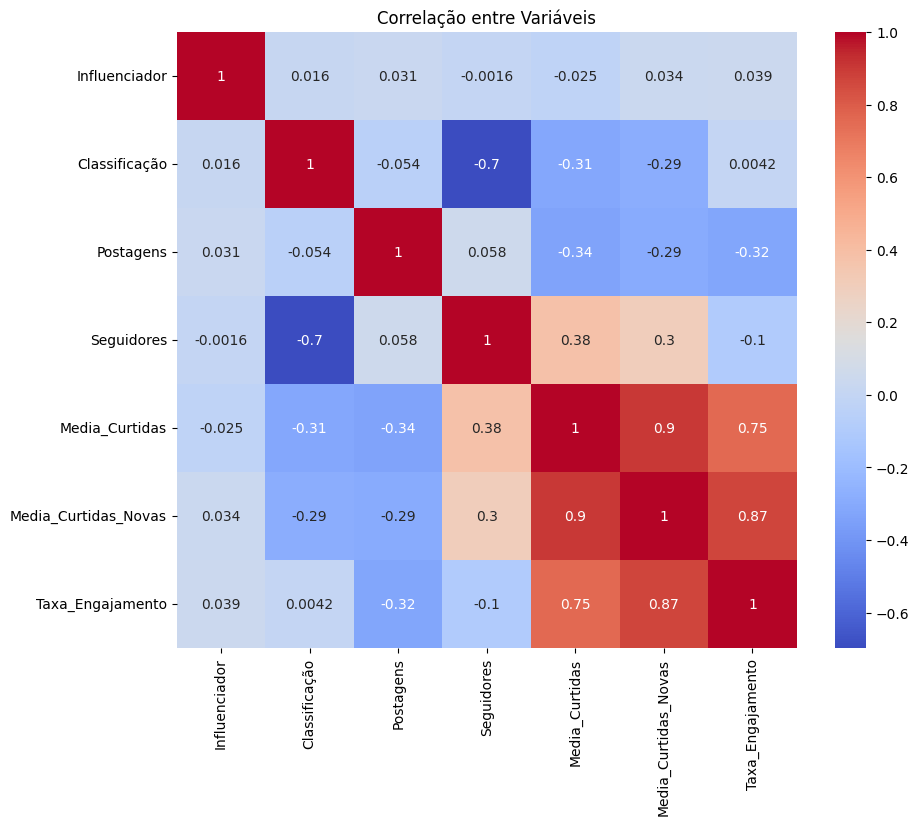

In [ ]:
# Relação entre as variaves, saber quais depende uma da outra.
correlation_matrix = analise_insta.corr()
print("\nMatriz de correlação:")
print(correlation_matrix)
print("\n")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

In [ ]:
#variavel essas que estão sendo usanadas como variaveis independentes.

important_columns = correlation_matrix['Taxa_Engajamento'].sort_values(ascending=False)
print("\nColunas mais importantes com base na correlação:")
print(important_columns)


Colunas mais importantes com base na correlação:
Taxa_Engajamento        1.000000
Media_Curtidas_Novas    0.869202
Media_Curtidas          0.754587
Influenciador           0.038789
Classificação           0.004245
Seguidores             -0.100905
Postagens              -0.324068
Name: Taxa_Engajamento, dtype: float64


                Feature        VIF
0         Influenciador   3.514960
1         Classificação   3.177547
2             Postagens   2.180415
3            Seguidores   5.240147
4        Media_Curtidas  10.269147
5  Media_Curtidas_Novas  19.394861
6      Taxa_Engajamento  12.810073


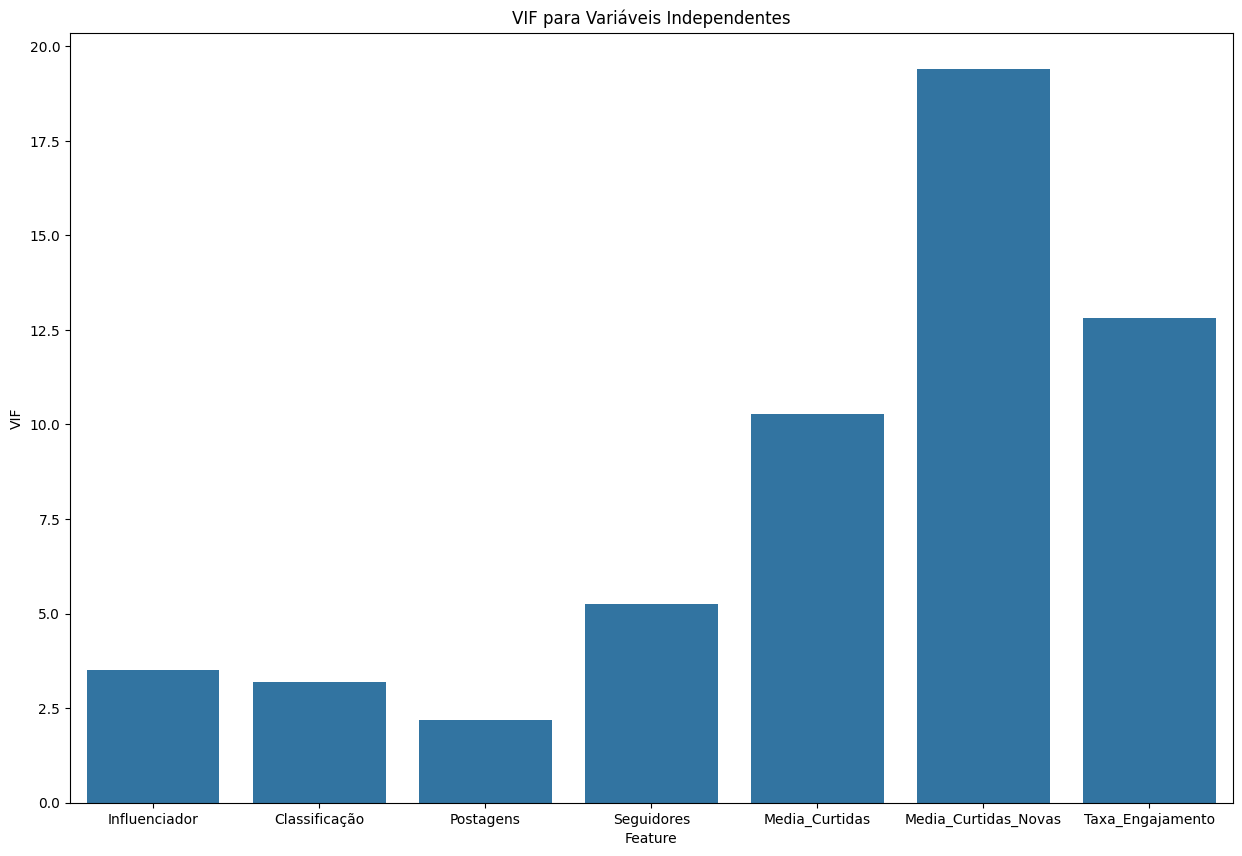

In [ ]:
#Analise vetorial e grafica do fator de inflação de variantacia entre as variaveis preditivas, muito boa para interpretação da multiconearidade
#das variaveis trabalhando com valores interessantes para o processo de treinamento da regressão linear
vif_data = pd.DataFrame()

vif_data["Feature"] = analise_insta.columns
vif_data["VIF"] = [variance_inflation_factor(analise_insta.values, i) for i in range(analise_insta.shape[1])]
print(vif_data)

plt.figure(figsize=(15, 10))
sns.barplot(x='Feature', y='VIF', data=vif_data)
plt.title('VIF para Variáveis Independentes')
plt.show()

# Distribuição da Taxa de Engajamento

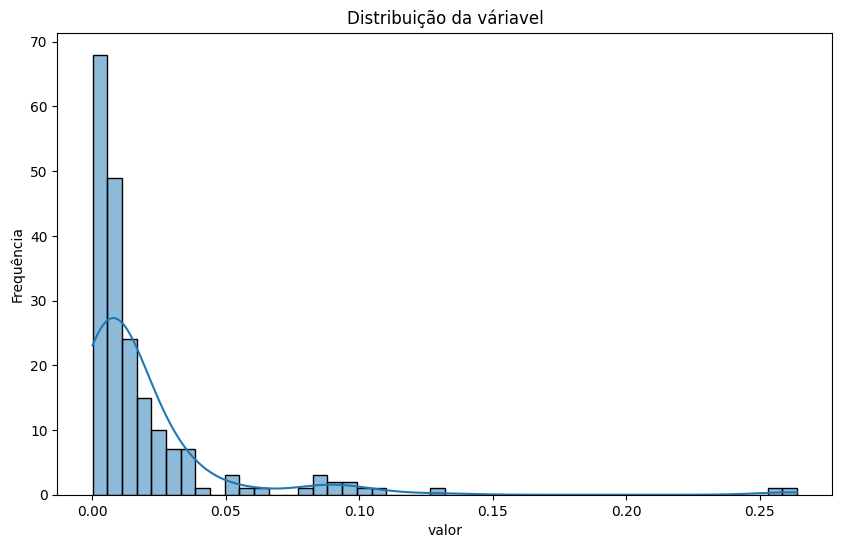

count    199.000000
mean       0.019020
std        0.033297
min        0.000100
25%        0.004100
50%        0.008800
75%        0.020350
max        0.264100
Name: Taxa_Engajamento, dtype: float64


In [ ]:
# A taxa de engajamento está concentrada em um intervalo específico, pois podemos observar que ocorre picos em certas áreas
# Existe outliers por existir valor muito alto em comparação com os demais.
plt.figure(figsize=(10,6))
sns.histplot(analise_insta['Taxa_Engajamento'], kde = True)
plt.title('Distribuição da váriavel')
plt.xlabel('valor')
plt.ylabel('Frequência')
plt.show()
print (analise_insta ['Taxa_Engajamento']. describe())

In [ ]:
#Remover outliers calculado o intervalo interquartil (IQR)
Q1 = analise_insta['Taxa_Engajamento'].quantile(0.25)
Q3 = analise_insta['Taxa_Engajamento'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
analise_insta = analise_insta[(analise_insta['Taxa_Engajamento'] >= lower_bound) & (analise_insta['Taxa_Engajamento'] <= upper_bound)]

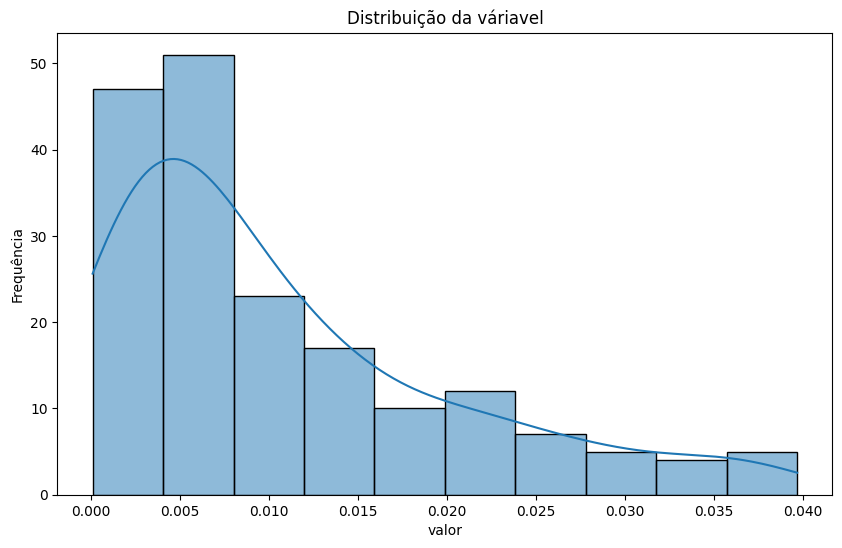

count    181.000000
mean       0.010701
std        0.009703
min        0.000100
25%        0.003500
50%        0.006900
75%        0.015300
max        0.039700
Name: Taxa_Engajamento, dtype: float64


In [ ]:
#Visualizando ser os outliers foram devidamente removidos.
plt.figure(figsize=(10,6))
sns.histplot(analise_insta['Taxa_Engajamento'], kde = True)
plt.title('Distribuição da váriavel')
plt.xlabel('valor')
plt.ylabel('Frequência')
plt.show()
print (analise_insta ['Taxa_Engajamento']. describe())

In [ ]:
#Retirando espaços invisíveis nos nomes das colunas
analise_insta.columns = analise_insta.columns.str.strip()

In [ ]:
# variáveis dependente e independentes
#Normatização dos dados utilizando os dados da correlação para um bom treinamento do modelo.

x = analise_insta[['Media_Curtidas', 'Seguidores', 'Postagens']]

# Target (variável alvo: se o solicitante é inadimplente ou não)
y = analise_insta['Taxa_Engajamento']


In [ ]:
# Dividindo o conjunto de dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#Criando regressão linear usando a técnica Lasso, objetivo dela é evitar overfitting.
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_treino, y_treino)

Lasso(alpha=0.1)

In [ ]:
#Previsão

y_treino_pred = lasso_model.predict(x_treino)
y_teste_pred = lasso_model.predict(x_teste)

In [ ]:
#calcular metricas
train_mse = mean_squared_error(y_treino, y_treino_pred)
test_mse = mean_squared_error(y_teste, y_teste_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_treino, y_treino_pred)
test_r2 = r2_score(y_teste, y_teste_pred)
train_mae = mean_absolute_error(y_treino, y_treino_pred)
test_mae = mean_absolute_error(y_teste, y_teste_pred)
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R2: {test_r2}")
print(f"MAE: {test_mae}")



MSE: 5.00958531685573e-05
RMSE: 0.00707784240913552
R2: 0.5194946967631873
MAE: 0.005094460316351495


In [ ]:
#calcular imapctor da regularização
train_mae = mean_absolute_error(y_treino, y_treino_pred)
test_mae = mean_absolute_error(y_teste, y_teste_pred)
print(f"Erro de treinamento: {train_mae}")
print(f"Erro de teste: {test_mae}")

print("c", lasso_model.coef_)
print("b", lasso_model.intercept_)

Erro de treinamento: 0.005426402094784035
Erro de teste: 0.005094460316351495
c [ 4.27535202e-09 -5.74675896e-11 -5.85177911e-07]
b 0.01140488570197197


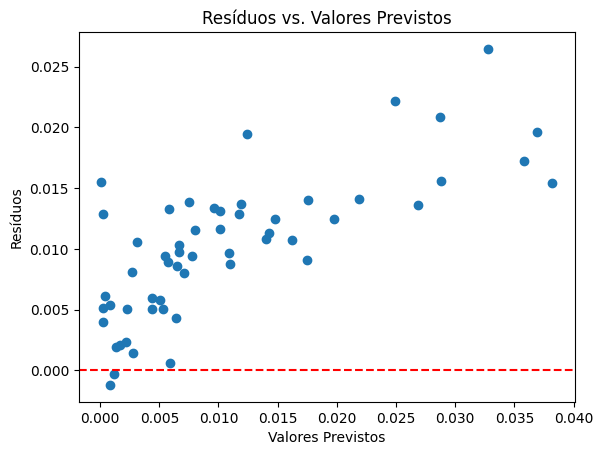

In [ ]:
# plotagem da Heterocedasticidade, ele detecta se está havendo uma dispersão ao londo que o  modelo se ajusta.
plt.scatter(y_teste, y_teste_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos')
plt.show()

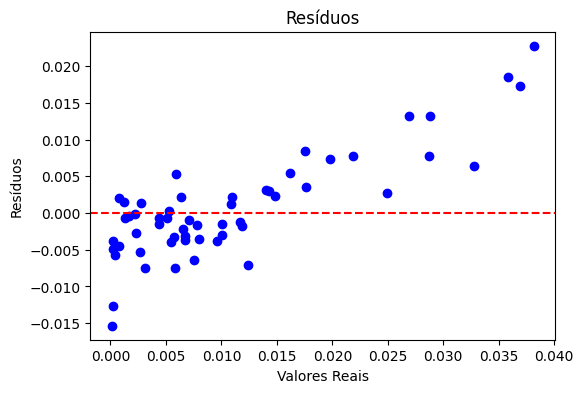

In [ ]:
#Visualização dos resultados, com valores independentes e juntos
plt.figure(figsize=(6, 4))
plt.scatter(y_teste, y_teste - y_teste_pred, c='blue', marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos')
plt.xlabel('Valores Reais')
plt.ylabel('Resíduos')
plt.show()


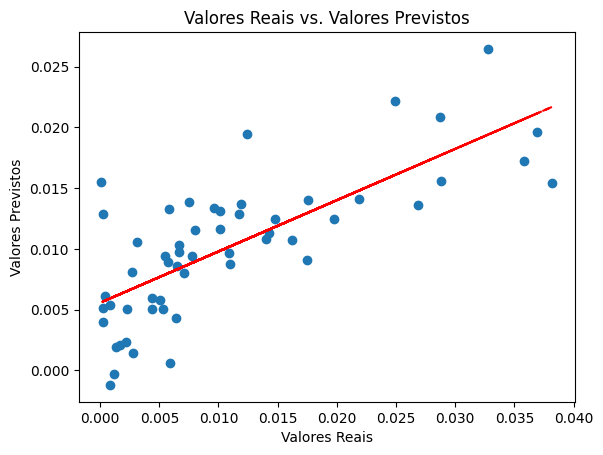

In [ ]:
#Analise dos valores reais e os previstos
plt.scatter(y_teste, y_teste_pred)
m, b = np.polyfit(y_teste, y_teste_pred, 1)
plt.plot(y_teste, m * y_teste + b, color='red', linestyle='--')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Valores Previstos")
plt.show()